In [114]:
#Importar modulos
import pandas as pd
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from matplotlib import rcParams

In [115]:
#Leer datos y guardar en variable
nombre_archivo = 'Synergy_logistics.csv'
datos = pd.read_csv(nombre_archivo)

In [116]:
""" 
Top 10: rutas de exportacion con mayor frecuencia 
Una ruta se define por: origin, destination, transport_mode

"""
#Crear lista origen-destino con zip
rutas = [origen +"-"+ destino for origen, destino in zip(list(datos['origin']), list(datos['destination']))] 
#Nuevo campo en datos
datos['ruta'] = rutas
#Obtener solo exportaciones
exportaciones = datos[datos['direction'] == 'Exports']
#Agrupar por ruta, transport_mode y obtener tamaño
rutas_exportacion = exportaciones.groupby(['ruta','transport_mode'])
#Obtener tamaño de cada ruta y ordenar
rutas_exportacion = rutas_exportacion.size().reset_index(name='conteo').sort_values(ascending=False,by='conteo').head(10)

print("-----------------------------------------------------------------------")
print("|        T O P   1 0 : R U T A S   D E   E X P O R T A C I O N        |")
print("-----------------------------------------------------------------------")
for i in range(len(rutas_exportacion)):
    print("Ruta: {}, medio transporte: {}, frecuencia: {} ".format(rutas_exportacion.iloc[i]['ruta'],rutas_exportacion.iloc[i]['transport_mode'],rutas_exportacion.iloc[i]['conteo']))

-----------------------------------------------------------------------
|        T O P   1 0 : R U T A S   D E   E X P O R T A C I O N        |
-----------------------------------------------------------------------
Ruta: South Korea-Vietnam, medio transporte: Sea, frecuencia: 497 
Ruta: USA-Netherlands, medio transporte: Sea, frecuencia: 436 
Ruta: Netherlands-Belgium, medio transporte: Road, frecuencia: 374 
Ruta: China-Mexico, medio transporte: Air, frecuencia: 330 
Ruta: Japan-Brazil, medio transporte: Sea, frecuencia: 306 
Ruta: Germany-France, medio transporte: Road, frecuencia: 299 
Ruta: South Korea-Japan, medio transporte: Sea, frecuencia: 279 
Ruta: Australia-Singapore, medio transporte: Sea, frecuencia: 273 
Ruta: Canada-Mexico, medio transporte: Rail, frecuencia: 261 
Ruta: China-Spain, medio transporte: Air, frecuencia: 250 


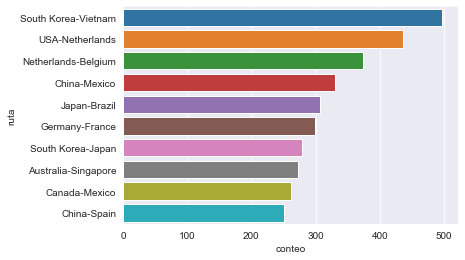

In [117]:
#Graficando el top 10 rutas de exportacion
sns.set_style('darkgrid')
sns.barplot(x = 'conteo',y = 'ruta', data = rutas_exportacion, orient='h')
plt.show()

In [118]:
""" 
Top 10: rutas de importacion con mayor frecuencia 
Una ruta se define por: origin, destination, transport_mode

"""
#Obtener solo importaciones
importaciones = datos[datos['direction'] == 'Imports']
#Agrupar por ruta, transport_mode y obtener tamaño
rutas_importacion = importaciones.groupby(['ruta','transport_mode'])
#Obtener tamaño de cada ruta y ordenar
rutas_importacion = rutas_importacion.size().reset_index(name='conteo').sort_values(ascending=False,by='conteo').head(10)

print("-----------------------------------------------------------------------")
print("|        T O P   1 0 : R U T A S   D E   I M P O R T A C I O N        |")
print("-----------------------------------------------------------------------")
for i in range(len(rutas_importacion)):
    print("Ruta: {}, medio transporte: {}, frecuencia: {} ".format(rutas_importacion.iloc[i]['ruta'],rutas_importacion.iloc[i]['transport_mode'],rutas_importacion.iloc[i]['conteo']))

-----------------------------------------------------------------------
|        T O P   1 0 : R U T A S   D E   I M P O R T A C I O N        |
-----------------------------------------------------------------------
Ruta: Singapore-Thailand, medio transporte: Sea, frecuencia: 273 
Ruta: Germany-China, medio transporte: Sea, frecuencia: 233 
Ruta: China-Japan, medio transporte: Air, frecuencia: 210 
Ruta: Japan-Mexico, medio transporte: Sea, frecuencia: 206 
Ruta: Malaysia-Thailand, medio transporte: Rail, frecuencia: 195 
Ruta: China-Thailand, medio transporte: Road, frecuencia: 145 
Ruta: Spain-Germany, medio transporte: Road, frecuencia: 142 
Ruta: China-United Arab Emirates, medio transporte: Sea, frecuencia: 114 
Ruta: Brazil-China, medio transporte: Sea, frecuencia: 113 
Ruta: USA-Thailand, medio transporte: Sea, frecuencia: 109 


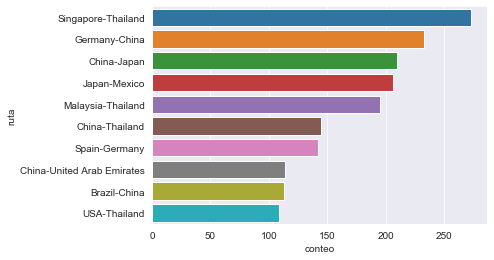

In [119]:
#Graficando el top 10 rutas de importacion
sns.set_style('darkgrid')
sns.barplot(x = 'conteo',y = 'ruta', data = rutas_importacion, orient='h')
plt.show()

In [120]:
""" Paises que dan el ingreso del 80 % de las exportaciones e importaciones"""
#Total de ingresos de todos los registros
total = datos['total_value'].sum()
#Agrupar por ruta y medio de transporte
rutas = datos.groupby(['origin','destination','transport_mode'])
#Obtener los ingresos de cada agrupamiento y ordenar de forma descendente
rutas = rutas.sum()['total_value'].sort_values(ascending=False)
rutas = rutas.reset_index()
#Obtener nuevo campo de porcentaje con respecto al ingreso total
rutas['porcentaje'] = (rutas['total_value'] / total) * 100
#Obtener porcentaje acumulado
rutas['porcentaje_acumulado'] = rutas.cumsum()['porcentaje']
#Obtener los paises con respecto al 80 %
rutas_porcentaje_80 = rutas[rutas['porcentaje_acumulado'] <= 80]
#Agrupamos la ruta de la forma origin-destination
rutas_aux = [origen +"-"+ destino for origen, destino in zip(list(rutas_porcentaje_80['origin']), list(rutas_porcentaje_80['destination']))] 
#Crear nuevo campo de ruta
rutas_porcentaje_80['ruta'] = rutas_aux
#rutas_porcentaje_80
rutas_porcentaje_80


D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,origin,destination,transport_mode,total_value,porcentaje,porcentaje_acumulado,ruta
0,China,Mexico,Air,12250000000,5.679413,5.679413,China-Mexico
1,Canada,Mexico,Rail,8450000000,3.917636,9.597049,Canada-Mexico
2,South Korea,Vietnam,Sea,6877007000,3.188356,12.785405,South Korea-Vietnam
3,France,United Kingdom,Sea,5427000000,2.516096,15.301501,France-United Kingdom
4,South Korea,Japan,Sea,4741000000,2.198049,17.499550,South Korea-Japan
...,...,...,...,...,...,...,...
61,USA,Netherlands,Sea,1032187000,0.478548,77.992860,USA-Netherlands
62,France,Poland,Rail,1030000000,0.477534,78.470394,France-Poland
63,USA,Brazil,Rail,996000000,0.461771,78.932165,USA-Brazil
64,China,Russia,Rail,989046000,0.458547,79.390712,China-Russia


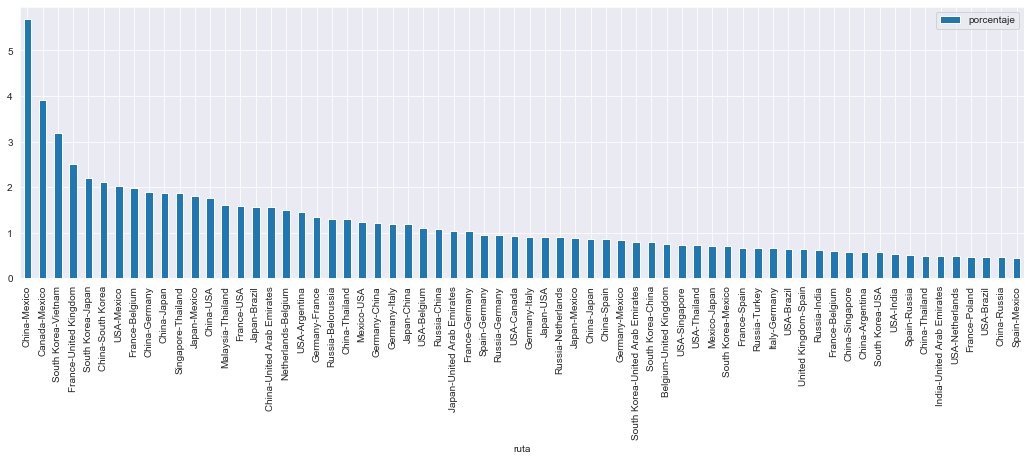

In [121]:
#Graficar las rutas que aportan el 80 % ingresos a la empresa
df=pd.DataFrame(rutas_porcentaje_80,columns=["ruta","porcentaje"])
df.plot(x="ruta", y=["porcentaje"], kind="bar",figsize=(18,5))
plt.show()



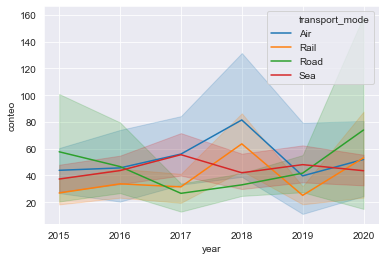

In [122]:
"""Medios de transporte por exportaciones"""

medios_por_exportacion = exportaciones.groupby(['transport_mode','year','ruta']) #ruta
medios_por_exportacion = medios_por_exportacion.size().reset_index(name='conteo')


#Graficar
sns.lineplot(x="year", y="conteo",
             hue="transport_mode", 
             data=medios_por_exportacion)

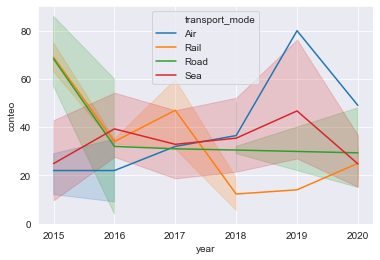

In [123]:
"""Medios de transporte por importaciones"""
medios_por_importacion = importaciones.groupby(['transport_mode','year','ruta']) #ruta
medios_por_importacion = medios_por_importacion.size().reset_index(name='conteo')


#Graficar
sns.lineplot(x="year", y="conteo",
             hue="transport_mode", 
             data=medios_por_importacion)